<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

**DIPLOMADO EN BIG DATA Y DATASCIENCE**



#**Proyecto de negocio 1: Predicción del precio de hospedajes en Airbnb para la ciudad de Nueva York**

**Contexto:** Airbnb es una empresa que ofrece una plataforma de software dedicada a la oferta de alojamientos particulares y turísticos mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios. Muchos nuevos anfitriones no cuentan con información global de tendencias del mercado por lo que sus precios no son óptimos. Airbnb gana una comisión por cada arrendamiento, por lo tanto, está interesado en que sus anfitriones cobren una tarifa óptima de acuerdo a las características del hospedaje. Si los anfitriones ganan más… Airbnb también.

**Problema de Negocio:** La empresa Airbnb lo ha contratado para desarrollar un análisis descriptivo y exploratorio que permita responder la siguiente pregunta: ¿Cuál es la variable o característica más relevante para determinar el precio de un hospedaje en Airbnb?

**Sistema de información:** El conjunto de datos objetivo posee información acerca de 30.000 hospedajes de la plataforma Airbnb en la ciudad de Nueva York. Los datos a usar son datos públicos creados por Inside Airbnb, para más información puede consultar [aquí]( http://insideairbnb.com/get-the-data/).


## Indicaciones para resolver el Taller

El objetivo de este taller es que usted pueda desarrollar un análisis exploratorio completo del dataset propuesto. Para ello tendrá que programar, investigar y analizar todos los resultados que vaya obteniendo. Tenga en cuenta las siguientes indicaciones:

* Puede visualizar los resultados esperados en la mayoría de ejercicios, use esto como una guía, no es un requisito.
* Añada comentarios al código para que documente sus soluciones. 
* **Coloque su análisis en una celda de Texto luego de cada resultado.**
* Para resolver un ejercicio puede usar tantas celdas de Código o Texto como requiera.

Si se le presenta un error de código o duda. Siga los siguientes pasos:
1. Lea y entienda el error, para ello puede buscar en la documentación de la librería o googlearlo
2. Intente resolverlo
3. Comuníquese con el expero temático usando el Foro, recuerde enviar un pantallazo del error y mencionar que Ejercicio está solucionando. **Abstengase de compartir el link de su Notebook en el Foro.**



A continuación, se listan algunos recursos que pueden ser valiosos para su análisis.
* En esta página puede encontrar las gráficas que se pueden construir dependiendo de las variables disponibles, una breve explicación de cada gráfica y código para construir cada visualización. https://www.data-to-viz.com/
* Documentación de Pandas. https://pandas.pydata.org/docs/index.html
* Documentación de Seaborn. https://seaborn.pydata.org/index.html
* Documentación de Folium. https://python-visualization.github.io/folium/

## 0)-Librerías necesarias para el proyecto

A continuación vamos a cargar las librerías necesarias para el desarrollo de este caso.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
sns.set()


In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.9.16
NumPy 1.22.4
Pandas 1.5.3
Matplotlib 3.7.1
Seaborn 0.12.2


Este caso de uso fue creado con las siguientes versiones:

```
Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2
```



## 1)-Data set de AirBnb

In [ ]:
pd.options.display.max_columns = 100 # Permite visualizar todas las columnas del dataframe

airbnb = pd.read_csv('https://github.com/HarryVargas96/UdeCataluna/blob/main/data/airbnb.csv?raw=true', delimiter=',')

airbnb.head(3)

,id,name,transit,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Very close to F and G trains and Express bus i...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1


In [ ]:
# Dimensiones del dataframe
airbnb.shape

(30179, 76)

In [ ]:
# Resumen de las variables del dataframe
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   transit                                       18190 non-null  object 
 3   host_id                                       30179 non-null  int64  
 4   host_since                                    30170 non-null  float64
 5   host_response_time                            17082 non-null  object 
 6   host_response_rate                            17082 non-null  float64
 7   host_is_superhost                             30170 non-null  float64
 8   host_listings_count                           30170 non-null  float64
 9   host_identity_verified                        30170 non-null 

## 2)-Análisis Univariado

### 2.1-Descripcion de las variables estadísticas del dataset

El dataframe airbnb tiene 76 columnas. Acontinuación se hace la detección de las variables listadas.

* price
* latitud
* longitud
* host_is_superhost
* neighbourhood
* property_type
* room_types
* bathrooms
* bedrooms
* number_of_reviews
* reviews_per_month
* parking

[Aquí](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing) encontrará el diccionario de Datos para el conjunto de datos de trabajo.

Nota: Puede encontrar variables que estén representadas por números, sin embargo, su tipología puede ser cualitativa o categórica.

#### RESPUESTA:

Deacuerdo a la base de datos presentada por Airbnb, se presentan a continuación la descripcion de las variables estadísticas ofrecidas por la plataforma.

|Nombre de la variable|Descripción|Tipología estadística|Tipología computacional|
|---|---|---|---|
|price|Precio diario en dólares|Cuantitativa continua|int|
|latitude|Latitud geoespacial basado en World Geodetic System|Cuantitativa continua|float|
|longitude|Longitud geoespacial basada en World Geodetic System|Cuantitativa continua|float|
|host_is_superhost|Clasificacion de anfitrion de alta calidad|Cuantitativa discreta binaria| Bolean|
|neighbourhood|Barrio de ubicacion del host en New York|Cualitativa Nominal|String/text|
|property_type|Tipo de propiedad seleccionada por el usuario/ofrecida por el host|Cualitativa Nominal|String/Category|
|room_types|Tipo de habitacion ofrecida por el host|Cualitativa Nominal|String/Category|
|bathrooms|Numero de baños provistos por el host|Cuantitativa Discreta|int|
|bedrooms|Numero de habitaciones ofrecidas por el host|Cuantitativa Discreta|int|
|number_of_reviews|Número de reviews totales que tiene el host|Cuantitativa Discreta|int|
|reviews_per_month|Número de reviews por mes que tiene el host|Cuantitativa Discreta|int|
|parking|Disponibilidad de parqueadero por parte de la propiedad ofrecida por el host|Cualitativa dicotómico|int|


### 2.2-Resumen estadístico del dataframe

Obtenga un resumen estadístico para las variables: price, bedrooms, bathrooms latitude y longitude. Haga un corto análisis de sus hallazgos. ¿Cuál es el rango de cada variable? ¿La distribución de la variable es simétrica? ¿Hay atípicos? ¿Los valores son lógicos en el contexto del negocio?



Para familiarizarnos con nuéstros datos y tener una perspectiva de que está sucediendo con nuéstro negocio, primero calculamos las estadísticas clásicas de nuéstras variables estadísticas, como los valores promedio, la desviación estandard, el rango, la simetría de los datos y los cuartíles. 

Acontinuación, se muéstra el analisis estadístico inicial de las variables más importantes para airbnb, las cuales son el precio, numero de baños, numero de habitaciones, latitud y longitud de los hosts.

In [ ]:
airbnb_main_stat = airbnb[['price','bedrooms','bathrooms','latitude','longitude']]
airbnb_main_stat.describe()

,price,bedrooms,bathrooms,latitude,longitude
count,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000
mean,132.949965,1.265516,1.151595,40.728593,-73.952292
std,93.151824,0.614659,0.422225,0.054541,0.044117
min,0.000000,1.000000,0.500000,40.499790,-74.244420
25%,65.000000,1.000000,1.000000,40.690720,-73.982085
50%,100.000000,1.000000,1.000000,40.721450,-73.955280
75%,175.000000,1.000000,1.000000,40.762790,-73.936435
max,500.000000,11.000000,7.500000,40.913060,-73.716900


A partir de las estadísticas mostradas anteriormente podemos deducir las siguientes concluciones iniciales para nuéstro negocio:

*   A partir de la tabla anterior podemos observar que el precio promedio de alojamiento en NweYork es de 133 Dólares, precio con el cuál podríamos obtener una habitación con un baño.

*   A partir de la desviación estándard podémos ver que los précios varían considerablemente, pues ésta desviación representa más del valor medio del precio promedio, lo que nos dice que con gran seguridad en NewYork encontrarémos alojamientos de Airbnb que no se encuentran necesariamente cercanos alos 133 dólares, de hecho, podríamos con mayor seguridad encontrar alojamientos que varían entre los 133 +/- 93 dólares.

*   Observando el minimo y máximo de los précios, podemos entender que el precio de los alojamientos en NewYork por noche oscilan entre los cero y 500 dólares, con un máximo de 11 habitaciónes y 7 baños.

*   Observando los cuartiles, podemos entender que el 25% de los alojamientos se encuentran al rededor de los 65 dólares para uno con una habitación y un baño. El 50% de los alojamientos poseen una habitación y un baño con un precio de 100 dólares, 75% de los alojamientos poseen un único baño y una única habitación con un precio de 175 dólres. Ésto nos indica inicialmente que los valores de los alojamientos no están diréctamente relacionados (aunque posiblemente relacionados) con el número de habitaciones o baños, así mísmo, el hecho de que el máximo de los valores se encuentre en 500 dólares para 11 habitaciones y 7 baños, nos dice que existen pocos alojamientos con alta capacidad de huéspedes, de hecho, la grán mayoría resulta ser de una única habitación y un único baño.
*   Por otra parte, la baja varianza en los datos de longitud y latitud nos dice que la gran mayoría de los alojamientos se encuéntran al rededor de una mísma zona.








Para continuar analisis exploratorio de nuéstros datos, revisamos el rango de cada variable principal. Luego observamos si las distribuciónes de las variables más relevantes para nuéstro caso de negocio son simétricas o no. Luego, procederémos a analizar si con base a los cuartíles de la distribución exísten valores atípicos.

La implementación cruda del skeewness la cual es la medida estadística de simetrica de distribución con respecto al promedio viene dada por el código siguiente.

In [ ]:
def skewness(data_list):
  mean = sum(data)/len(data)
  variance = sum([((x-mean)**2) for x in data])/len(data)
  str_dev = math.sqrt(variance)
  skew = sum( [((x-mean)/str_dev)**3 for x in data] ) /len(data)

  return skew

Sin embargo, se puede usar pd.skeew para calcular la simetria de una distribución. Acontinuación se calcula la simetría de la distribución junto con los valores atípicos.  

In [ ]:
# Calculo de los rangos de las distribuciónes de las variables estadísticas principales.
rank_airbnb_main_stat = airbnb_main_stat.max()-airbnb_main_stat.min()
rankdata=pd.DataFrame(rank_airbnb_main_stat,columns=['Rank'])

# Calculo de la simetría de las distribuciónes de las variables estadísticas principales.
skewness_main_data = airbnb_main_stat.skew()
skewnessdata = pd.DataFrame(skewness_main_data,columns=['Skewness'])

# Unimos las dos dataframes
merged_data = pd.concat([rankdata,skewnessdata],axis=1)
merged_data

,Rank,Skewness
price,500.00000,1.505775
bedrooms,10.00000,2.960579
bathrooms,7.00000,4.596785
latitude,0.41327,0.288144
longitude,0.52752,1.294304


Con base a los datos anteriores, concluimos lo siguiente:

*   El precio de alojamientos enlistados en la plataforma AirBnb en NewYork poseen un precio que oscila entre los cero y 500 dólares, donde podrémos encontrar alojamientos que cuéntan con entre 1 y 10 habitaciónes, y con entre 1 y 7 baños.
*   Ya que el skewness de todas las distribuciónes es positivo, vemos que éstas NO SON SIMÉTRICAS, más aún, éstos valores indícan que las distribuciónes poseen un corrimiento o sesgo hacia la izquierda del promedio. Concrétamente, vemos que para los precios, número de habitaciones y baños, exíste una alta concentración de precios y número de habitaciones/baños antes del promedio.

*   Complementando éstas estadísticas con aquellas obtenídas en la tabla anterior (promedio, desviación estándard, cuartíles) podemos empezar a obervar que la mayoría de los alojamientos poseen un precio alto, mayor a 133 dólares. También podemos ver que la mayoría de los alojamientos posee un único baño y una única habitación, por ende, el alto valor de asimetría hacia la izquierda en el caso del número de los baños y habitaciónes, nos indica que hay un pequeño número de alojamientos con un alto numero de baños y habitaciones.





Procedemos a determinar los valores atípicos y determinar si los valores que poseemos en el data set principal corresponden con el proyecto de negocio, primero, realicemos un count plot y un boxplot para visualizar el precio con respecto al numero de habitaciones y de baños.

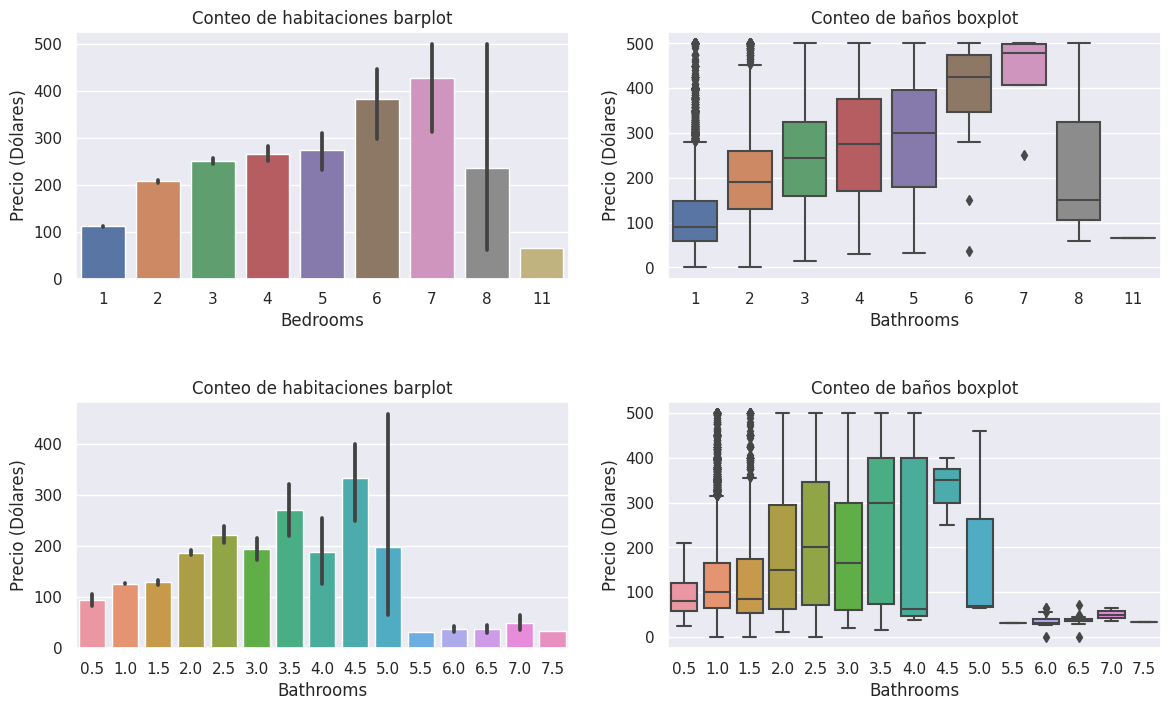

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(14,8))
sns.barplot(data=airbnb_main_stat, x="bedrooms", y="price", ax=ax[0,0])
sns.boxplot(data=airbnb_main_stat, x="bedrooms", y="price", ax=ax[0,1])
sns.barplot(data=airbnb_main_stat, x="bathrooms", y="price", ax=ax[1,0])
sns.boxplot(data=airbnb_main_stat, x="bathrooms", y="price", ax=ax[1,1])

ax[0,0].set_title("Conteo de habitaciones barplot")
ax[0,0].set_xlabel("Bedrooms")
ax[0,0].set_ylabel("Precio (Dólares)")
ax[0,1].set_title("Conteo de baños boxplot")
ax[0,1].set_xlabel("Bathrooms")
ax[0,1].set_ylabel("Precio (Dólares)")
ax[1,0].set_title("Conteo de habitaciones barplot")
ax[1,0].set_xlabel("Bathrooms")
ax[1,0].set_ylabel("Precio (Dólares)")
ax[1,1].set_title("Conteo de baños boxplot")
ax[1,1].set_xlabel("Bathrooms")
ax[1,1].set_ylabel("Precio (Dólares)")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
airbnb['bathrooms'].unique()

array([1. , 2. , 1.5, 2.5, 3. , 4.5, 0.5, 4. , 3.5, 6. , 6.5, 5. , 7.5,
       7. , 5.5])

De los anteriores plots, podemos concluir lo siguiente:

*   Exíste un problema con los datos referentes a la variable "bathrooms" pues no corresponden al objeto de negocio, pues es imposible que esta variable pueda tener valores no enteros como 1.5, 2.5 etc.
*   Deacuerdo al countplot, vemos que el precio no sigue una relación directamente proporcional o lineal, con respecto al numero de habitaciones/baños, de hecho, después de llegar a un máximo con respecto al número de habitaciones/baños, el precio decae abruptamente.
*   Observando los boxplots, vemos que a medida que aumente el numero de habicationes/baños, las distribuciones del precio se hacen más anchas (el rango intercuartílico aumenta), lo que quiere decir que a medida que el numero de habitaciones/baños aumenta la varianza de los precios también incrementa, no obstante, para número de habitaciones/baños muy altos, los preicos se estabilizan ya que el rango intercuartílico se hace más pequeño.
*   Teniendo en cuenta que los bigotes de un boxplot representan la variabilidad de los datos más allá del rango intercuartil (IQR), los puntos más allá de éstos se consideran "valores atípicos" o "outliers", los cuales son valores extremos (o errores) dentro del dataframe. Con esto en mente, se puede observar que para el numero de habitaciones y de baños, EXÍSTEN VALORES ATÍPICOS los cuáles se ubican en numeros bájos de éstas dos variables, es decir, exísten alojamientos con pocas habitaciones y pocos baños que extrañamente presentan un precio considerablemente alto.
*   Por otra parte, podemos ver que debido a las posiciones de los cuartíles, las distribuciones para los precios para cada categoría dentro de las variables número de habitaciones/baños, no son simétricas en su mayoría. Quiere esto decir que las distribuciónes por categoría con respecto al precio presentan sesgos.



Debido a que hemos detectado la presencia gráfica de valores atípicos, procedemos a detectarlos dentro de nuéstro dataframe.

In [ ]:

# Outliers de una unica columna
def outliers(dataframe, colum_name):
  q1 = dataframe[colum_name].quantile(0.25)
  q3 = dataframe[colum_name].quantile(0.75)
  IQR =q3-q1
  condition = (dataframe[colum_name] < (q1-1.5*IQR)) | (dataframe[colum_name] > (q3+1.5*IQR))
  outliers_data = dataframe[condition].any(axis=1)
  return outliers_data


# Outliers de la clase de una columna con respecto a otra columna
def outliers_per_col(dataframe, col_name_1, col_name_2):
    iqr = lambda x: x.quantile(0.75) - x.quantile(0.25)
    col_1_IQR = dataframe.groupby(col_name_1)[col_name_2].apply(iqr).to_dict()

    col_1_bounds = {}

    for group, IQR in col_1_IQR.items():
        col_1_bounds[group] = (dataframe.loc[dataframe[col_name_1]==group, col_name_2].quantile(0.25)-1.5*IQR,
                             dataframe.loc[dataframe[col_name_1]==group, col_name_2].quantile(0.75)+1.5*IQR)
  
    outliers = dataframe.loc[dataframe.apply(lambda group: 
                (group[col_name_2] < col_1_bounds[group[col_name_1]][0]) or 
                (group[col_name_2] > col_1_bounds[group[col_name_1]][1]), axis=1)]
    
    return outliers

Obtenemos los outliers del precio con respecto al numero de habitaciones.

In [ ]:
outliers_per_col(airbnb_main_stat, "bedrooms", "price")

,price,bedrooms,bathrooms,latitude,longitude
68,349,1,1.0,40.73776,-73.95327
69,349,1,1.0,40.73738,-73.95482
135,300,1,1.0,40.71892,-73.99628
148,349,1,1.0,40.73674,-73.95247
150,299,1,1.0,40.73714,-73.95296
...,...,...,...,...,...
29989,450,1,1.0,40.75113,-74.00231
30028,316,1,1.0,40.72283,-73.99472
30032,365,1,1.0,40.73206,-73.98776
30056,380,1,1.0,40.75288,-73.97269


Obtenemos los outliers del precio con respecto al numero de baños.

In [ ]:
outliers_per_col(airbnb_main_stat, "bathrooms", "price")

,price,bedrooms,bathrooms,latitude,longitude
21,400,2,1.5,40.66499,-73.97925
68,349,1,1.0,40.73776,-73.95327
69,349,1,1.0,40.73738,-73.95482
89,375,2,1.0,40.72255,-73.99346
112,429,2,1.5,40.73939,-73.99612
...,...,...,...,...,...
30032,365,1,1.0,40.73206,-73.98776
30056,380,1,1.0,40.75288,-73.97269
30058,350,3,1.0,40.75508,-73.93258
30134,350,1,1.0,40.75204,-74.00292


## 3)-Visualizaciones
Tenga presente las siguientes recomendaciones para todas las gráficas que realice.

Recuerde que una buena gráfica al menos debe tener:
* **título:** descripción corta de lo que se está mostrando
* **títulos de ejes:** título para la variable en x, título para la variable en y
* **análisis:** lo más valioso de la gráfica es la interpretación y análisis del analista, la gráfica por sí sola no genera valor

### 3.1-Analisis descriptivo del precio de los alojamientos

En esta subsección, analizamos como el precio del alojamiento se comporta en la ciudad de NewYork a lo largo del dataset.

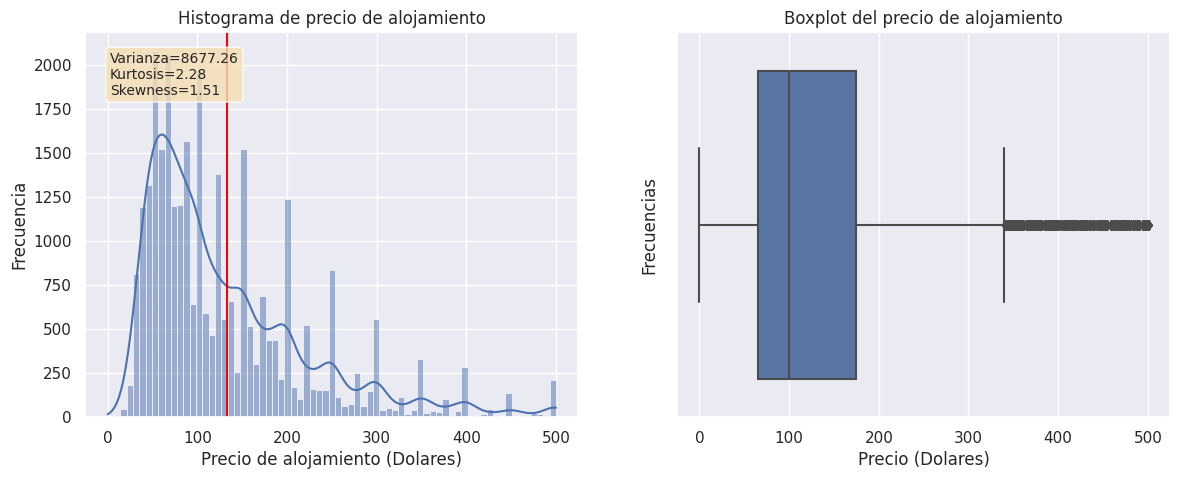

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
# Plot para el histograma de los precios de alojamiento
sns.histplot(data=airbnb,x="price",kde=True, ax = ax[0])
sns.boxplot(data=airbnb,x="price")

# Plot vertical para indicar el promedio del precio
mean = airbnb['price'].mean()
ax[0].axvline(mean, color='red')

# Agregamos un pequeño box para mostrar el kurtosis, la varianza y el skewness
variance = round(airbnb['price'].var(),2)
kurtosis = round(airbnb['price'].kurt(),2)
skewness = round(airbnb['price'].skew(),2)

textstr = '\n'.join( (r'Varianza=%.2f' % (variance, ), r'Kurtosis=%.2f' % (kurtosis, ), r'Skewness=%.2f' % (skewness, )) )
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax[0].text(0.05, 0.95, textstr, transform=ax[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax[0].set_title("Histograma de precio de alojamiento")
ax[0].set_xlabel("Precio de alojamiento (Dolares)")
ax[0].set_ylabel("Frecuencia")
ax[1].set_title("Boxplot del precio de alojamiento")
ax[1].set_xlabel("Precio (Dolares)")
ax[1].set_ylabel("Frecuencias")

plt.subplots_adjust(hspace=0.5)
plt.show()

Desde el histograma del precio de los alojamientos conluimos lo siguiente:

*   El precio de los alojamientos presenta una distribución multinomial, es decir, presenta multiples máximos locales. Lo que quiere decir que exísten catagorías de precios a lo largo del rango de precios que poseen una alta presencia en NewYork, sin embargo, no exíste un decaimiento en la frecuencia de los precios monotónica.
*   Desde la mdición de la Kurtosis, vemos que al ser una kurtosis positiva la distribucion de los precios es LEPTOKURTICA, lo que quiere decir que exíste una alta concentración de los valores en torno a una región específica de la distribución. En términos del contexto del negocio, ésto se traduce como que la mayoría de los valores del precio están concentrados en torno a un unico valor.
*   En complemento a lo anteriormente dicho, podemos ver que ésta suposicion de concentración se valida también en conjunto con el skewnes, pues al ser en este caso positivo, nos indica que los precios suelen estar POR DEBAJO DEL PROMEDIO, lo que indica que la distribución tiene un sesgo hacia la izquierda del promedio y la cola de la distribución de los precios se hace más extensa hacia la derecha con un valor decreciente de frecuencias. En términos del contexto del negocio ésto nos indica que la mayoría de los precios de los alojamientos se encuentran por debajo del promedio, donde dicho promedio se ubica más hacia la derecha debido a la presencia de un no tan basto número de precios distribuidos a lo largo de un ancho rango.
*   El alto valor de la varianza de los precios nos indica no solo que la distribucion de los precios no es simétrica si no a demás que exíste una alta probabilidad de outliers que se salen del promedio. Ésto lo podémos confirmar viendo tanto el histograma como el boxplot, pues encontramos en el primer caso una distribución multinomial cuyos picos poseen un gap considerable entre los valores de la tendencia decreciente de la cola derecha y el valor que adquieren. Por otra parte podemos ver que en el boxplot encontramos un número considerable de outliers que se ubican después del "bigote" superior.




Text(0, 0.5, 'Frecuencia')

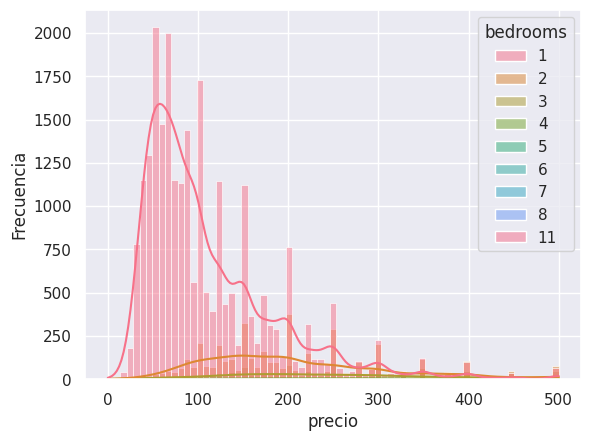

In [ ]:
sns.histplot(data = airbnb_main_stat, 
            x = 'price', 
            kde = True,
            palette='husl',
            hue = 'bedrooms')  

plt.xlabel('precio')
plt.ylabel('Frecuencia')

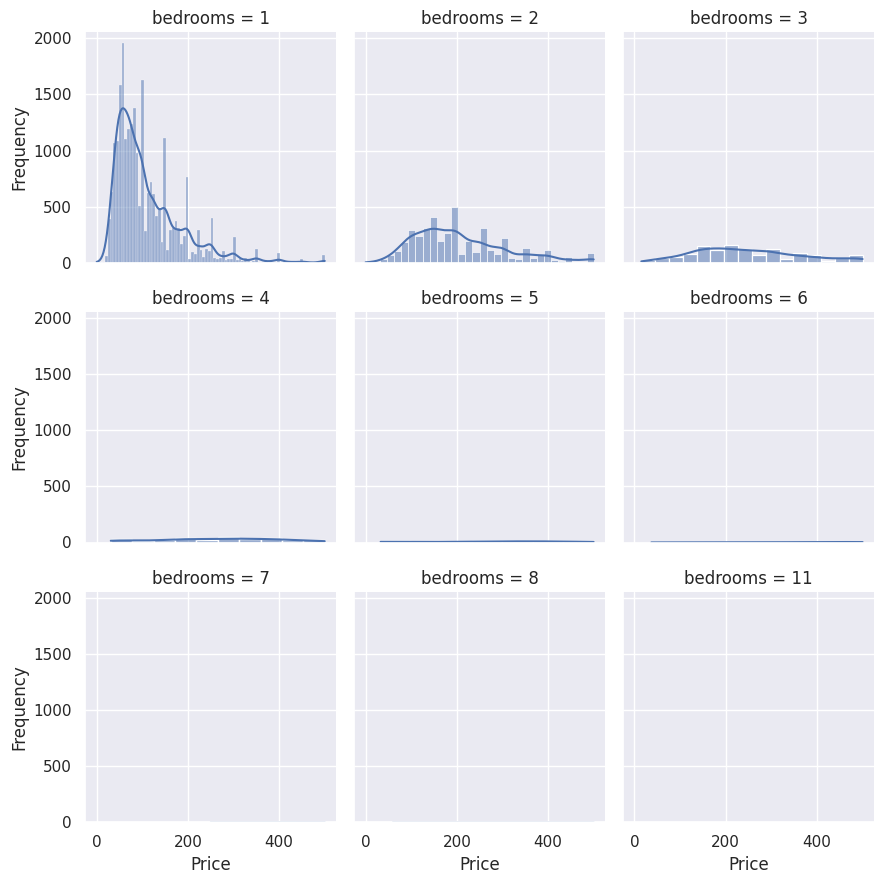

In [ ]:
g = sns.FacetGrid(data=airbnb_main_stat, 
                  col='bedrooms',
                  col_wrap=3)
g.map(sns.histplot, 'price', kde=True)
g.set_axis_labels('Price', 'Frequency')
plt.show()

Asi pues, de los anteriores dos plots domde se muéstran los histogramas de los precios para cada numero de habitaciónes, podeémos entender que la mayoría de los alojamientos son ofrecidos con una única habitacion con un precio bajo. por otra parte a medida que el número de habitaciónes aumenta, el número de precios disminuye, generando a demás una distribución con un menor sesgo hacia la izquierda y tendiendo más a ser simétrica. No obstante como podemos ver para los histogramas para habitaciones mayores a 5, la presencia de alojamientos con tales características es casi nulo.

### 3.2-Análisis descriptivo de la posicion del alojamiento

Basado en lo que hemos hecho hasta ahora, analizaremos las variables longitude y latitude.

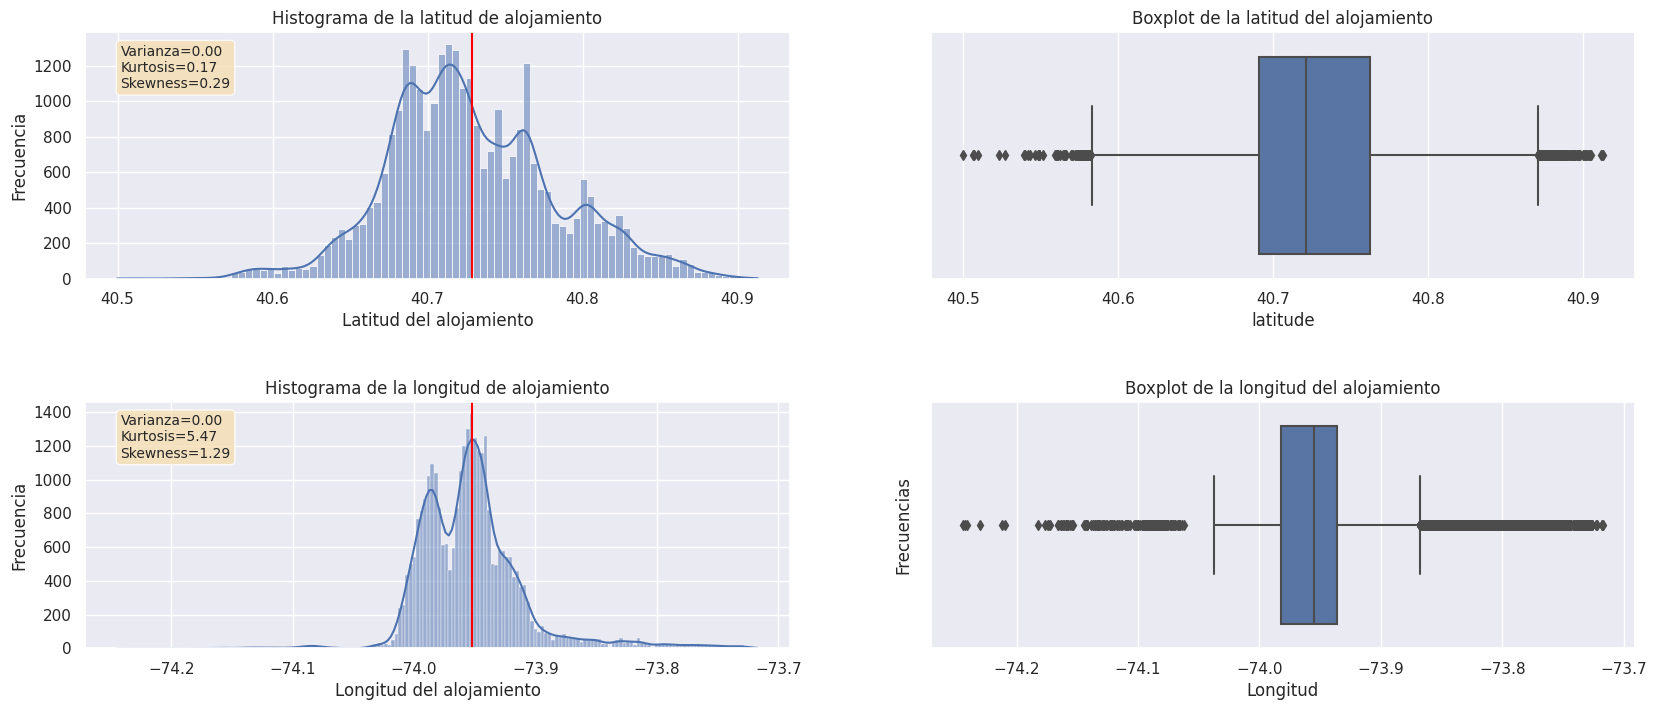

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,8))
# Plot para el histograma de la latitud del alojamiento
sns.histplot(data=airbnb,x="latitude",kde=True, ax = ax[0,0])
sns.boxplot(data=airbnb,x="latitude", ax = ax[0,1])
sns.histplot(data=airbnb,x="longitude",kde=True, ax = ax[1,0])
sns.boxplot(data=airbnb,x="longitude", ax = ax[1,1])

# Plot vertical para indicar el promedio de la latitud y longitud
mean_lat = airbnb['latitude'].mean()
mean_lon = airbnb['longitude'].mean()
ax[0,0].axvline(mean_lat, color='red')
ax[1,0].axvline(mean_lon, color='red')

# Agregamos un pequeño box para mostrar el kurtosis, la varianza y el skewness
variance_lat = round(airbnb['latitude'].var(),5)
kurtosis_lat = round(airbnb['latitude'].kurt(),2)
skewness_lat = round(airbnb['latitude'].skew(),2)
variance_lon = round(airbnb['longitude'].var(),5)
kurtosis_lon = round(airbnb['longitude'].kurt(),2)
skewness_lon = round(airbnb['longitude'].skew(),2)

textstr = '\n'.join( (r'Varianza=%.2f' % (variance_lat, ), r'Kurtosis=%.2f' % (kurtosis_lat, ), r'Skewness=%.2f' % (skewness_lat, )) )
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax[0,0].text(0.05, 0.95, textstr, transform=ax[0,0].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

textstr_2 = '\n'.join( (r'Varianza=%.2f' % (variance_lon, ), r'Kurtosis=%.2f' % (kurtosis_lon, ), r'Skewness=%.2f' % (skewness_lon, )) )
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax[1,0].text(0.05, 0.95, textstr_2, transform=ax[1,0].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax[0,0].set_title("Histograma de la latitud de alojamiento")
ax[0,0].set_xlabel("Latitud del alojamiento")
ax[0,0].set_ylabel("Frecuencia")
ax[0,1].set_title("Boxplot de la latitud del alojamiento")
ax[1,0].set_xlabel("Latitud")
ax[1,0].set_ylabel("Frecuencias")

ax[1,0].set_title("Histograma de la longitud de alojamiento")
ax[1,0].set_xlabel("Longitud del alojamiento")
ax[1,0].set_ylabel("Frecuencia")
ax[1,1].set_title("Boxplot de la longitud del alojamiento")
ax[1,1].set_xlabel("Longitud")
ax[1,1].set_ylabel("Frecuencias")

plt.subplots_adjust(hspace=0.5)
plt.show()

Las coordenadas de longitud y latitud nos permiten obervar como los alojamientos se distribuyen espacialmente en la ciudad, asi, al observar los histogramas de frecuencia de posicion de los alojamientos podemos deducir lo siguiente:

*   En términos de latitud, la distribución de frecuencias es multimodal con un leve sesgo hacia la izquierda y una varianza casi nula.
*   En términos de longitud, la distribución de frecuencias es bimodal con un alto sesgo hacia la izquierda y una varianza casi nula.
*   Estas dos observaciónes anteriores, nos indícan que los alojamientos se concentran primordialmente entorno a una única zona de NewYork, en especial en términos de la longitud donde la distribucion de ubicaciones es prácticamente simétrica y cuyo máximo coincide con el promedio de las ubicaciones.
*   En términos del negocio, podemos observar que los alojamientos se ofrecen en una zona privilegiada de la ciudad, más específicamente, se puede dar la hipótesis de que en términos de la longitud exísten dos zonas privilegiadas para ofrecer alojamientos donde una es particularmente especial ya que representa la longitud de ubicacion promedio. En términos de la latitud, podémos suponer que exísten cuatro zonas privilegiadas para ofrecer alojamientos (ya que la distribución presenta cuatro máximos), donde dichas cuatro zonas especiales se localizan entorno a una ubicación promedio que no es tan comúnmente usada como las otras cuatro pero representa el punto medio entre ellas.
*   Desde los box plots, podemos volver a entender que las ubicaciones de los alojamientos se realiza en unas zonas privilagiadas, sinembargo exíste una gran cantidad de alojamientos atípicos que se ubican en las periferias de las zonas privilagiadas.


### 3.3-Análisis descriptivo del barrio de alojamiento

En ésta subsección analizamos el número de alojamientos por barrio y obervaremos que porcentaje de los alojamientos totales de la ciudad son cubiertos por cada barrio.





Teniendo en cuenta que las distribuciones de los hospedajes se realizan practicamente en torno al promedio, analicemos ahora como el barrio determina el número de alojamientos que alberga.

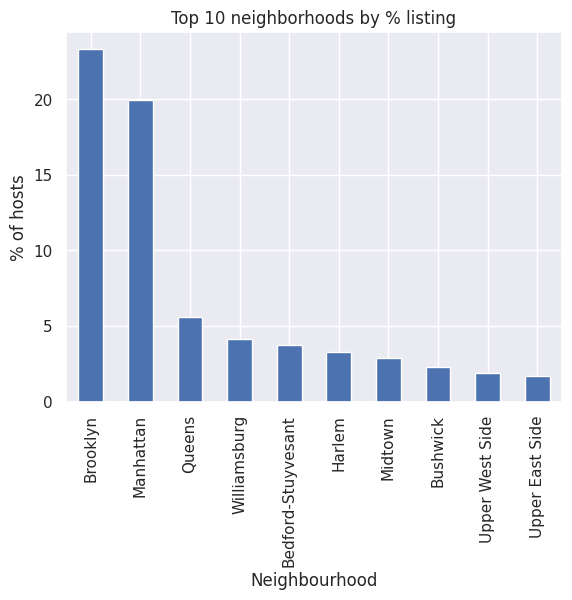

In [ ]:
counts = airbnb['neighbourhood'].value_counts().sort_values(ascending=False)
counts = counts/sum(counts)*100
pd.DataFrame(counts)
top_10_counts = counts.head(10).plot.bar()

ax = top_10_counts
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('% of hosts')
ax.set_title('Top 10 neighborhoods by % listing')
plt.show()

In [ ]:
porcentage_covered_top_3 = counts.head(10).iloc[:3].sum()
print(counts.head(10))
print('**************************')
print("El porcentaje de hospedajes cubierto por los tres más barrios más importantes es:",porcentage_covered_top_3)

Brooklyn              23.281405
Manhattan             19.960225
Queens                 5.618164
Williamsburg           4.103414
Bedford-Stuyvesant     3.758701
Harlem                 3.251574
Midtown                2.847199
Bushwick               2.290355
Upper West Side        1.879350
Upper East Side        1.697050
Name: neighbourhood, dtype: float64
**************************
El porcentaje de hospedajes cubierto por los tres más barrios más importantes es: 48.85979449784554


De las los conteos de hospedajes por barrio podémos concluir que:

*   El numero de hospedajes por barrio decae abrúptamente rápido en función del barrio, lo que en el contexto de negocio nos indica no solo que exísten un puñado de zonas preferenciales para hospedarse sino que el número de hospedajes por barrio depende fuértemente del tipo de barrio en cuestión.
*   Los tres barrios de NewYork que más albergan alojamientos en la ciudad cubren el 48.85% de los alojamientos, asi, quienes lideran ésta lísta son respectivamente Brooklyn, Manhattan y Queens.



### 3.4-Análisis descriptivo de "Superhost"

Superhost (cuya traducción del inglés significa “Super anfitrión”) es una categoría de Airbnb que destaca a los anfitriones más experimentados, hospitalarios y mejor valorados. Estos anfitriones reciben un distintivo especial en su anuncio y su perfil que les otorga una mayor visibilidad en la plataforma.


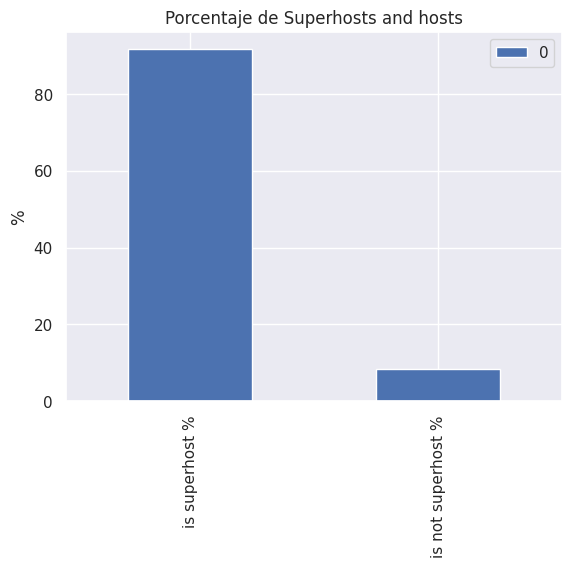

In [ ]:
# Respuesta
counts = airbnb['host_is_superhost'].value_counts()
is_superhost_counts = counts.iloc[0]
is_not_superhost_counts = counts.iloc[1]

percentage_nosp = is_not_superhost_counts/(is_superhost_counts + is_not_superhost_counts)*100
percentage_sp = is_superhost_counts/(is_superhost_counts + is_not_superhost_counts)*100

host = pd.Series({"is superhost %":percentage_sp, "is not superhost %":percentage_nosp})
host=pd.DataFrame(host).plot.bar()

ax = host
ax.set_ylabel('%')
ax.set_title('Porcentaje de Superhosts and hosts')
plt.show()

Como podemos observar, el hecho de que el host esté catalogado como "superhost" es de vital importancia, pues el 91% de los alojamientos han obtenido ésta catagoría.

### 3.5-Análisis descriptivo del tipo de alojamiento


Basado en los ejercicios anteriores analice las variable property_type y parking con los recursos que considere necesarios. No olvide analizar y describir sus resultados.

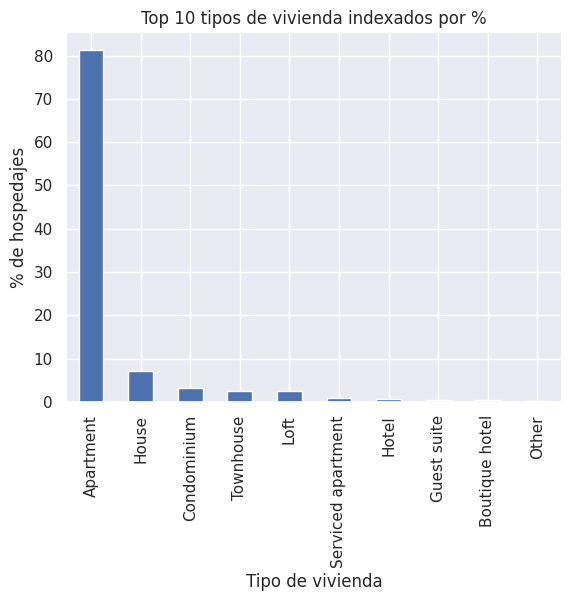

In [ ]:
counts = airbnb['property_type'].value_counts().sort_values(ascending=False)
counts = counts/sum(counts)*100
pd.DataFrame(counts)
top_10_counts = counts.head(10).plot.bar()

ax = top_10_counts
ax.set_xlabel('Tipo de vivienda')
ax.set_ylabel('% de hospedajes')
ax.set_title('Top 10 tipos de vivienda indexados por %')
plt.show()

<ipython-input-20-76896ef6a58c>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=airbnb,x="property_type",kde=True,palette='husl', ax = ax[0])


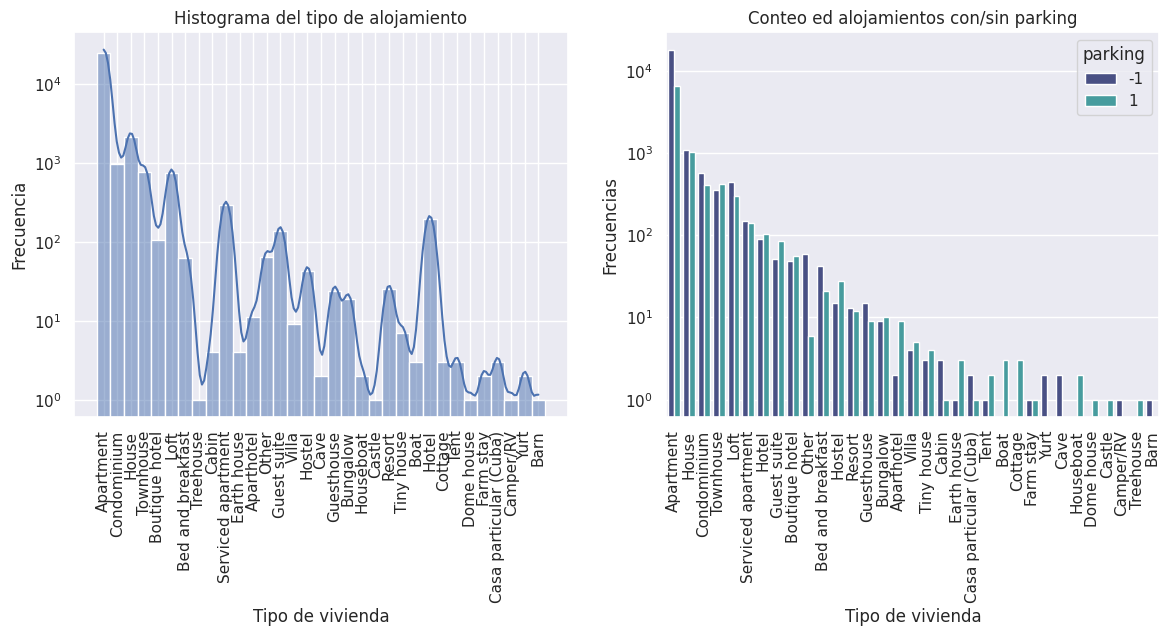

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
sns.histplot(data=airbnb,x="property_type",kde=True,palette='husl', ax = ax[0])
sns.countplot(data=airbnb,x="property_type",hue='parking',palette='mako', ax = ax[1], order=airbnb['property_type'].value_counts().index)

ax[0].set_title("Histograma del tipo de alojamiento")
ax[0].set_xlabel("Tipo de vivienda")
ax[0].set_ylabel("Frecuencia")
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_yscale('log')

ax[1].set_title("Conteo ed alojamientos con/sin parking")
ax[1].set_xlabel("Tipo de vivienda")
ax[1].set_ylabel("Frecuencias")
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_yscale('log')

plt.show()


Debido a que la proporcionalidad de los datos para la variable "property_type" es demaciado marcada para tipos de hopedaje suscesivos, aplicamos una escala logarítmica en los ejes verticales de los plots. En el lado izquierdo podemos ver el histograma del tipo de hospedaje mientras que en el lado derecho podémos ver el conteo de hospedajes con y sin parqueadero por tipo de hospedaje. Estas dos gráficas arrojan las siguientes observaciones:

*   En NewYork, los cinco típos de hospedajes que más son ofrecidos para arrendamiento en orden descendente son respectivamente apartamentos, casas, condominios, casas de campo y apartamentos con servicios. No obstante la diferencia entre el numero de hospedajes de una clase y otra difieren por ordenes de magnitud, donde los hospedajes tipo apartamento ocupan más del 80% de los hospedajes ofrecidos en la ciudad.
*   Se observa que la diferencia entre el numero de tipos de hospedaje con parking y sin parking no es tan pronunciada, de hecho, para los top 18 hospedajes, el numero de parking se equipara con el número de sin parking. No obstante es cierto que la mayoría de hospedajes dentro del top 18 son más aquellos hospedajes que no poseen parking que aquellos que si. Por otra parte a partir del puésto 19, la tendencia parece ser que el número de hospedajes con parking es mayo, es decir, la tendencia se invierte.



## 4)-Análisis multivariado

En la presente sección buscaremos responder algunas preguntas sobre como el precio de los hospedajes depende de las variables del servicio de alojamiento, verémos cuáles de éstas influyen en el mercado y cuáles son indiferentes al precio establecido.


### 4.1-Análisis descriptivo del superhost y el precio

A continuación buscamos saber si la categoría de superhost implica o no que el precio del servicio de alojamiento se incremente, para responder ésta pregúnta realizarémos un plot de barras comparando los valores minimos, máximos, promedios y medianos de cada categoría de la variable superhost.

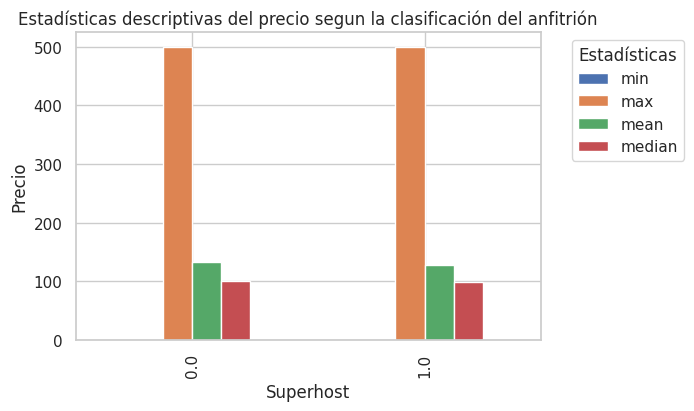

In [ ]:
# Agrupar por la columna 'host_is_superhost' y calcular las estadísticas descriptivas del precio
stats = airbnb.groupby('host_is_superhost')['price'].agg(['min','max','mean','median'])

# Se crea el gráfico de barras
ax = stats.plot(kind='bar', figsize=(6,4))

ax.set_xlabel('Superhost')
ax.set_ylabel('Precio')
ax.set_title('Estadísticas descriptivas del precio segun la clasificación del anfitrión')
ax.legend(title='Estadísticas',bbox_to_anchor=(1.05,1),loc='upper left')

plt.show()

Al realizar el gráfico de barras para ver la comparación de precio en dólares según si valor máximo, mínimo, promedio y mediano, vemos que sorprendentemente el valor de los precios promedio para los superhost y no superhosts es relativamente igual, de hecho la mediana en ambos casos es prácticamente la mísma. Ésto dentro del contexto del negocio, nos indica que el hecho de que el anfitrión sea o no catalogado como superhost no influye en el precio del servicio, es decir, que el hecho de que un anfitrión sea superhost no implica que el precio de su servicio sea mayor. Esto lo podemos volver a confirmar al ver los valores iguales del valor máximo y la mediana.

Text(0.5, 1.0, 'Boxplot comparativo sobre la variable superhost vs precio')

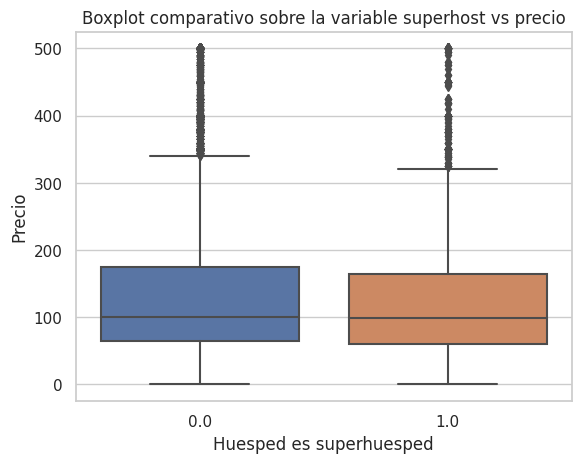

In [ ]:
ax=sns.boxplot(data=airbnb,x='host_is_superhost', y='price')
ax.set_xlabel('Huesped es superhuesped')
ax.set_ylabel('Precio')
ax.set_title('Boxplot comparativo sobre la variable superhost vs precio')

Para complementar nuéstra conclusion anterior, realizamos un boxplot comparativo entre el precio de los hispedajes para los superhost y para los no superhosts. Al observar dicho gráfic, vémos que las distribuciones para los precios son prácticamente iguales, podemos ver que los cuartíles Q1 y Q2 son prácticamente iguales miéntras que el cuartíl Q3 es levemente menor en los superhosts. Más aún, el bigote superior de los boxplots son prácticamente del mísmo valor siendo el límite del bigote para los superhosts levemente menor. La alta similitud en éstos plots nos ayuda a confirmar nuéstra hipotesis sobre el hecho de que ser superhost no incrementa o diminuye los précios de los hospedajes, asi, la categoría de superhost no es un factor determinante en el precio final del servicio. No obstante se resalta que contrario a lo que un snetido común ingénuo podría decir, el valor de los superhosts es levemente menor al del no superhosts. No obstante no tenemos evidencia suficiente para asegurar que ésta redición moderada del precio sea resultado de la categoría.

### 4.2- Análisis del precio en función del tipo de propiedad

Analicemos ahora la relación entre el tipo de propiedad y el precio usando un boxplot.


In [ ]:
# Para darle orden a la gráfica vamos a organizar los tipos de propiedades de menor mayor mediana

median_order = (airbnb.groupby('property_type') # agrupar por tipo de propiedad
['price'].                                      # filtrar el precio en cada grupo
median().                                       # calcular la mediana
sort_values().                 # organizar 
index)

median_order

Index(['Hostel', 'Treehouse', 'Earth house', 'Dome house', 'Castle', 'Villa',
       'House', 'Guesthouse', 'Tiny house', 'Farm stay', 'Townhouse', 'Barn',
       'Casa particular (Cuba)', 'Bed and breakfast', 'Guest suite', 'Hotel',
       'Apartment', 'Camper/RV', 'Cabin', 'Other', 'Yurt', 'Bungalow', 'Loft',
       'Condominium', 'Houseboat', 'Cave', 'Cottage', 'Tent', 'Boutique hotel',
       'Serviced apartment', 'Boat', 'Aparthotel', 'Resort'],
      dtype='object', name='property_type')

Text(0.5, 1.0, 'Precio del hospedaje en función del tipo de propiedad')

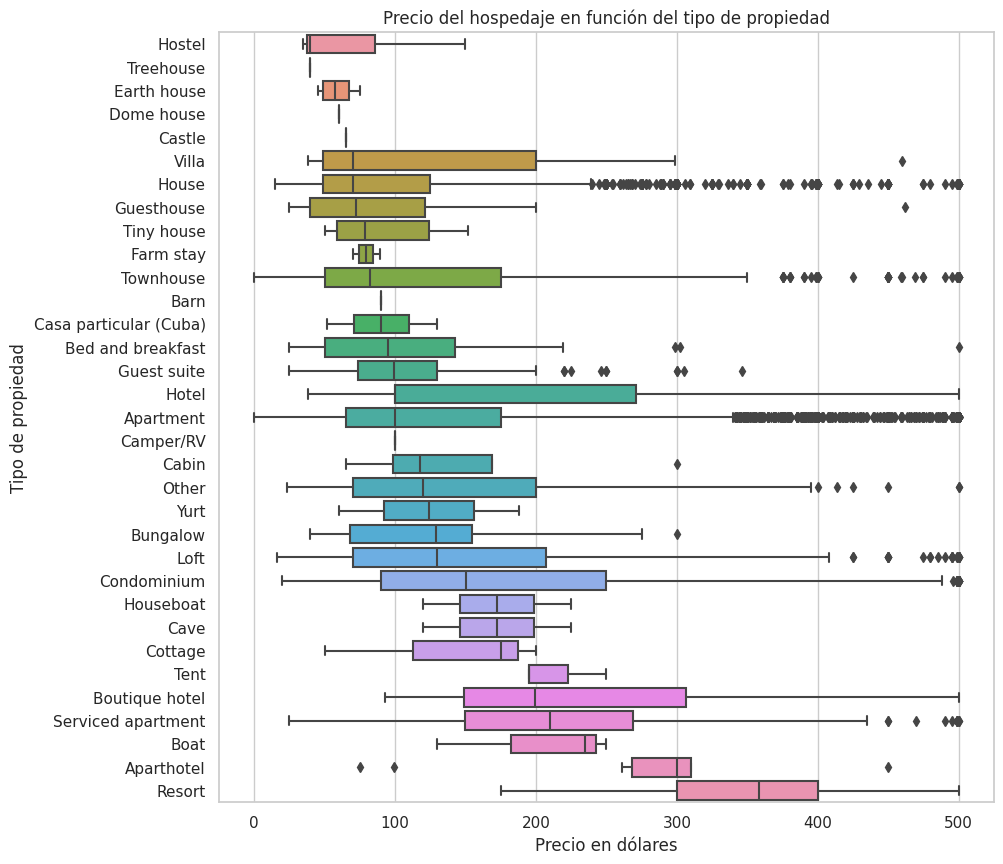

In [ ]:
fig = plt.figure(figsize = (10,10) ) # se crea la figura y se determina el tamaño

sns.boxplot(data = airbnb, 
            y = 'property_type', 
            x = 'price',
            order = median_order ) # ordenamiento de mayor a menor frecuencia

plt.xlabel('Precio en dólares')
plt.ylabel('Tipo de propiedad')
plt.title('Precio del hospedaje en función del tipo de propiedad')

Debido a la cantidad tan grande de tipos de propiedad, la gráfica anterior carece de valor y es demasiado compleja. Vamos a crear un subconjunto de datos solamente con los 5 tipos de propiedades que tienen mayor frecuencia. En el proceso no perderemos demasiados datos, ya que, el 96% de los hospedajes pertenecen a estas 5 categorías.


In [ ]:
# Primero, encontramos cuales son los 5 tipos de propiedades más comunes

airbnb['property_type'].value_counts(normalize = True).head(5)*100

Apartment      81.308194
House           7.041320
Condominium     3.253918
Townhouse       2.558070
Loft            2.452036
Name: property_type, dtype: float64

In [ ]:
# Extraemos el índice que contiene el nombre de las categorías de interés

top5_properties = (airbnb['property_type'].value_counts(normalize = True).head(5)*100).index
top5_properties

Index(['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft'], dtype='object')

`.isin()` nos permite encontrar todas las coincidencias existentes sobre una lista u objeto iterable. En este caso nos permite encontrar todos los hospedajes que pertenezcan a nuestro top 5 de tipos de propiedades. Para más información sobre este método consulte [aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html).



In [ ]:
# Creamos un filtro con el método isin()

top = airbnb.loc[airbnb['property_type'].isin(top5_properties)]
top.head()

,id,name,transit,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Very close to F and G trains and Express bus i...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Ten minutes walk to the 15th sheet F&G train s...,25326,40006.0,within an hour,1.0,1.0,2.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.65599,-73.97519,Condominium,Private room,2,1.0,1,1,Real Bed,"{Wifi,""Air conditioning"",""Free street parking""...",60,1,20,1,2 months ago,1,25,55,85,85,19,17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,2,1,1,0,1.37,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Metro 1 et A,26394,40014.0,NaN,NaN,0.0,1.0,1.0,"New York, NY, United States",Manhattan,40.86754,-73.92639,Apartment,Private room,2,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",80,1,20,4,14 months ago,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,1,0,1,0,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
# Creamos una lista con las 5 propiedades ordenadas de mayor a menor mediana

median_order_top = (top.groupby('property_type')
['price']
.median()
.sort_values(ascending= False)
.index)

median_order_top

Index(['Condominium', 'Loft', 'Apartment', 'Townhouse', 'House'], dtype='object', name='property_type')

Text(0.5, 1.0, 'Precio del hospedaje en función del tipo de propiedad')

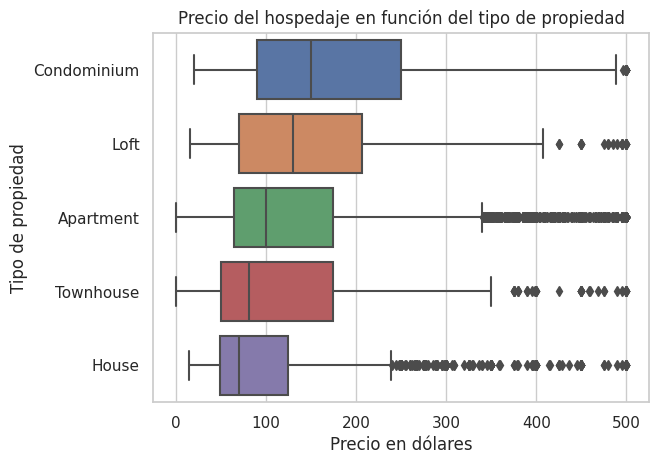

In [ ]:
# Finalmente construimos la gráfica solicitada con el nuevo subconjunto top

sns.boxplot(data = top, 
            y = 'property_type', 
            x = 'price',
            order = median_order_top) # las organizamos de acuerdo al top 5 obtenido anteriormente

plt.xlabel('Precio en dólares')
plt.ylabel('Tipo de propiedad')
plt.title('Precio del hospedaje en función del tipo de propiedad')

En la anterior visualización podemos observar una alta dispersión para  todas las categorías. Todas las distribuciones son asimétricas hacía la derecha, la asimetría es ocasionada por propiedades con precios mayores a la media en cada caso. Comparando las medianas podemos observar que en general los condominios son los tipos de propiedad más costosos seguido por los lofts y los apartamentos. 

**Conclusión: Se observa una distribución de precios ligeramente diferente para cada tipo de propiedad. Los precios sí se ven afectados por el tipo de propiedad, sin embargo, solamente esta variable no permite explicar el comportamiento del precio.**

Nota: Observe que en la gráfica general hay tipos de propiedades con mayor precio promedio que los condominios y menor precio que las casas, discuta al respecto.

### 4.3- Análisis del precio en función del barrio

En la presente subsección realizaremos un análisis similar al de la subsección anterior pero ésta ves intentando responder si el barrio afecta el precio del hospedaje.

Para empezar con ésta labor, realizamos primero un boxplot del precio en función del barrio para cada categoría.

Text(0.5, 1.0, 'Precio en función del barrio')

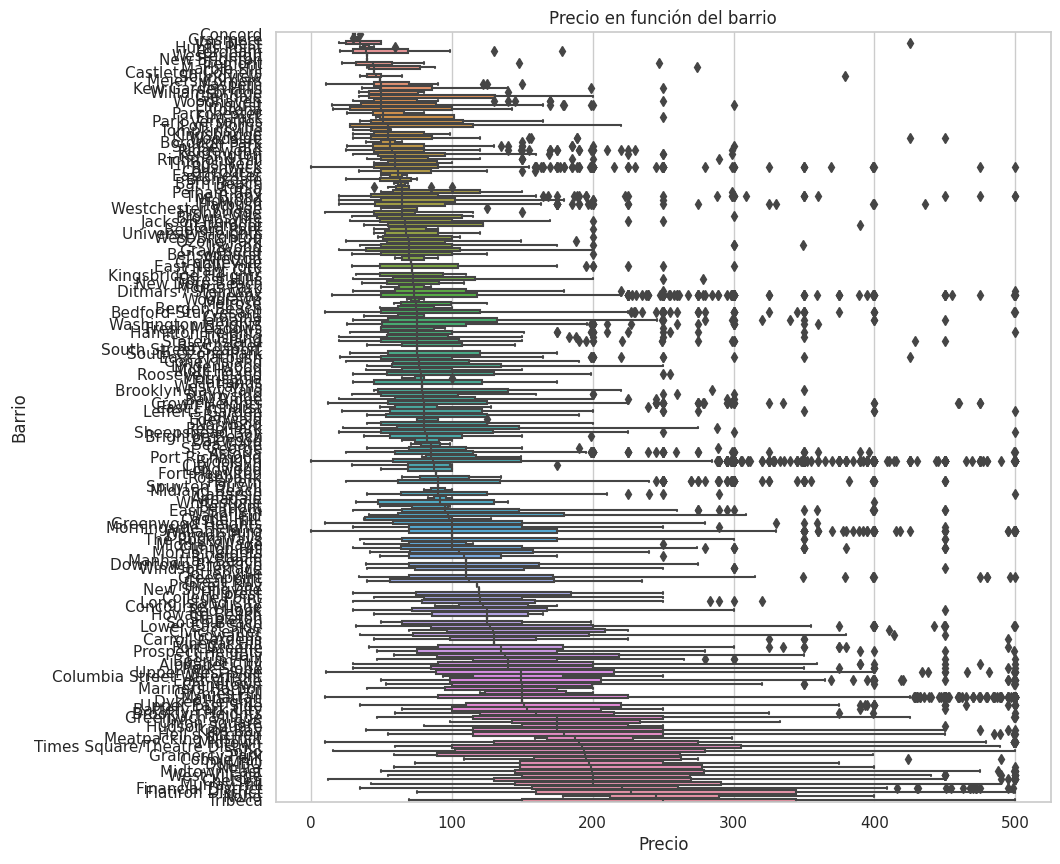

In [ ]:
# Empleamos un box plot inicial para observar como el precio varía en función del barrio
median_order = airbnb.groupby('neighbourhood')['price'].median().sort_values().index
fig = plt.figure(figsize=(10,10))
sns.boxplot(data=airbnb,
            y='neighbourhood',
            x='price',
            order=median_order)

plt.xlabel('Precio')
plt.ylabel('Barrio')
plt.title('Precio en función del barrio')

Al igual que en la subsección anterior, podemos ver que el boxplot no es útil debido a su alta complejidad, asi pues, realizaremos éste mísmo boxplot pero considerando sólo los 10 barrios más populares de acuerdo al valor de la mediana de los precios.

In [ ]:
# Definimos los 10 barrios cuyas medianas de los precios séan mas altas
top_10_nei = (airbnb['neighbourhood'].value_counts(normalize=True).head(10)*100).index
top_10_nei = airbnb.loc[airbnb['neighbourhood'].isin(top_10_nei)]
top_10_nei.head()


,id,name,transit,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Very close to F and G trains and Express bus i...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Ten minutes walk to the 15th sheet F&G train s...,25326,40006.0,within an hour,1.0,1.0,2.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.65599,-73.97519,Condominium,Private room,2,1.0,1,1,Real Bed,"{Wifi,""Air conditioning"",""Free street parking""...",60,1,20,1,2 months ago,1,25,55,85,85,19,17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,2,1,1,0,1.37,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Metro 1 et A,26394,40014.0,NaN,NaN,0.0,1.0,1.0,"New York, NY, United States",Manhattan,40.86754,-73.92639,Apartment,Private room,2,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",80,1,20,4,14 months ago,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,1,0,1,0,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


Text(0.5, 1.0, 'Precio en función del barrio')

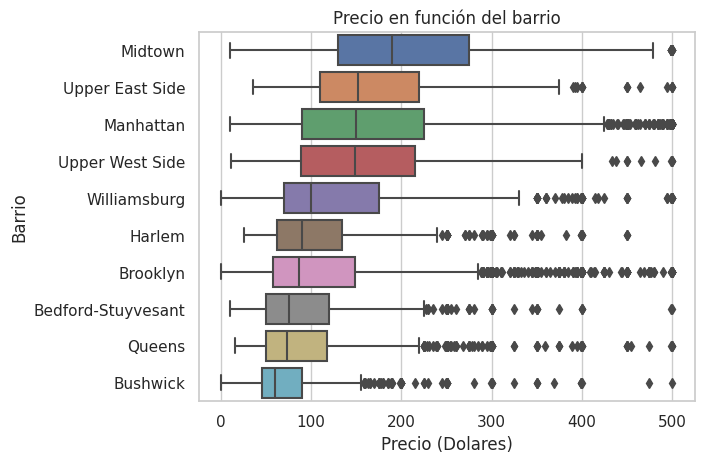

In [ ]:
# Generamos un boxplot comparativo del precio en functión del barrio para los 10 más relevantes
median_order_top = (top_10_nei.groupby('neighbourhood')['price'].median().sort_values(ascending=False).index)
sns.boxplot(data=airbnb,
            y='neighbourhood',
            x='price',
            order=median_order_top)

plt.xlabel('Precio (Dolares)')
plt.ylabel('Barrio')
plt.title('Precio en función del barrio')

Observando el gráfico anterior podémos ver que el precio por noche de los hospedajes si depende del barrio de ubicación del alomaniento, más aún, exíste una alta varianza en los precios por barrio que disminuye a medida que el barrio es menos "popular" en términos de cuantos hospedajes alberga. Se evidencia que entre más preferido sea el barrio, exíste un rango y varianza de los precios mayor. Por otra parte, a medida que la popularidad del barrio decrece, su mediana también, se evidencia entonces un decrecimiento casi monotónico en el valor de las medianas de los precios.

Si bien el precio del hospedaje por noche depende del barrio, es interesante ver como a medida que la popularidad del barrio disminuye, la presencia de valores atípicos se incrementa. Al igual que en el caso del precio en función del tipo de alojamiento, todas las distribuciónes para cada barrio son diferentes con una asimetría hacia la derecha o sesgo hacia la izquierda, lo cuál nos indica que la mayoría de los precios en todos los barrios suelen tender a la baja pero exísten unas propiedaes con precios altos mayor a la media que generan ésta asimetría.

### 4.4- Análisis del precio en función del parking

En la presente subsección intentaremos responder la preguna a cerca de si la disponibiliad de parking influye en el precio.

Text(0.5, 1.0, 'Precio en función de la disponibilidad de parking')

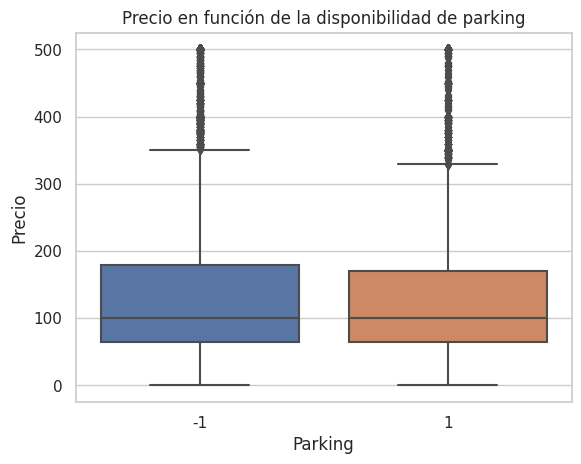

In [ ]:

ax=sns.boxplot(data=airbnb,
            x='parking',
            y='price')
ax.set_xlabel('Parking')
ax.set_ylabel('Precio')
ax.set_title('Precio en función de la disponibilidad de parking')

Del anterior boxplot podémos concluir que la disponibilidad de parking en los hospedajes no es una variable crítica en el valor de los precios pues las distribuciónes para ámbos casos no difieren sustancialemnte. Sin embargo si puede decirce que los precios de los hospedajes con parking son levemente menores en términos del cuartil Q3 y del bigote superior del boxplot.

### 4.5-Análisis de la longitud y la latitud de los alojamientos

A continuación intentaremos observar como ocurre la distribución espacial de los hospedajes en la ciudad de NewYork.

Text(0.5, 1.0, 'Hospedajes en función de la ubicación')

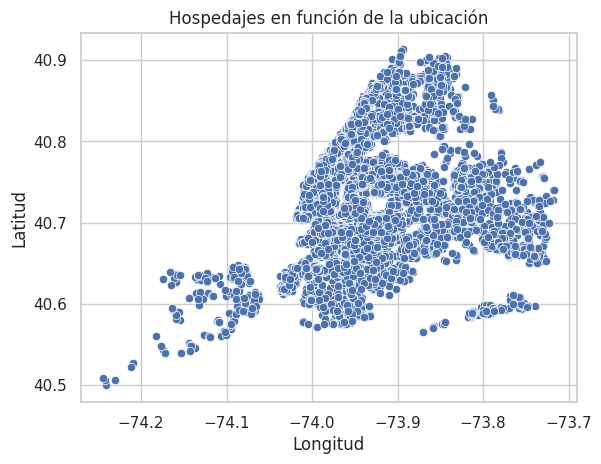

In [ ]:
ax=sns.scatterplot(data=airbnb,
                x='longitude',
                y='latitude')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Hospedajes en función de la ubicación')

El scatter plot de la latitud contra la longitud nos muéstra al ser coordenadas espaciales específicas para cada hospedaje, que la distribución de éstos es relativamente homogénea. Sin un análisis exausitvo, se puede ver como se forman clusters o grupos densos de hospedajes.

### 4.6-Uso de jointplot para evaluar puntos con alta concentración de hospedajes

En la visualización anterior pudimos observar algunos patrones de distribución de los hospedajes, sin embargo, por la gran cantidad de puntos no es posible analizar qué zonas tienen mayor cantidad de hospedajes. Vamos a ver un nuevo tipo de visualización que nos ayudará en ese análisis. La visualización jointplot nos va permitir visualizar al tiempo la distribución de cada variable por separado y adicionalmente veremos dónde hay mayor concentración de puntos usando un mapa de calor.

Para más información de este tipo de visualización consulte [aquí](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

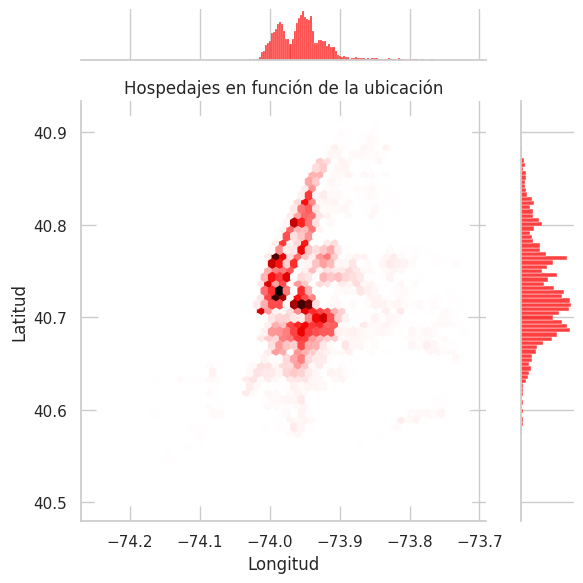

In [ ]:
sns.jointplot(data = airbnb,
              x='longitude', 
              y='latitude', 
              kind="hex", # define la forma de las zonas que vamos a construir
              color = 'red')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Hospedajes en función de la ubicación')
plt.tight_layout() # Evita el sobrelapamiento de elementos

Podemos obsevar una clara concentración de hospedajes en la zona de Manhattan y Brooklyn al sur del Central Park. Alrededor de del Central Park también se puede ver una alta cantidad de hospedajes. Esto se debe principalmente a que es una zona central, turística y prestigiosa de la ciudad.  Más adelante construiremos esta misma gráfica pero sobre el mapa de la ciudad de Nueva York.

<img src = "https://origin-www.nycgo.com/images/pages/71068/neighbs_socialshare_1200x628_fiveboros__facebook.png" alt = "Encabezado" width = "50%">  </img>

### 4.7-Uso de jointplot para evaluar la relación entre el número de reseñas y el precio.

En ésta subsección, esploraremos como el numero de reseñas que el hospedaje tenga afecta o no el precio del mísmo. Para ello realizamos un jointplot para determinar cómo éstas variables interacciónan.

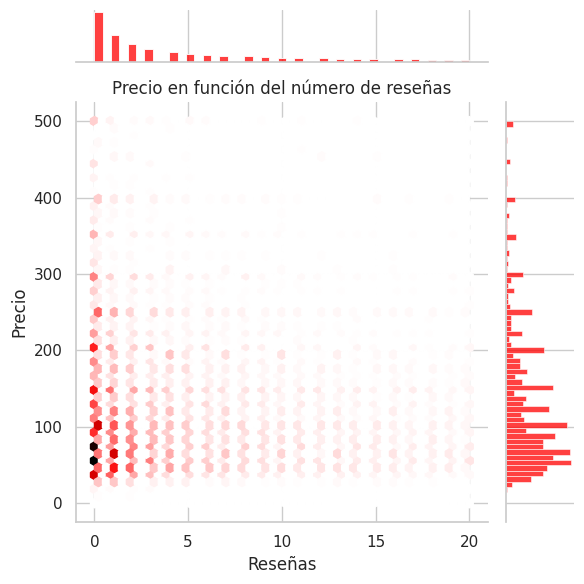

In [ ]:
sns.jointplot(data = airbnb,
              x='number_of_reviews', 
              y='price', 
              kind="hex", 
              color = 'red')

plt.xlabel('Reseñas')
plt.ylabel('Precio')
plt.title('Precio en función del número de reseñas')
plt.tight_layout()

Desde el anterior jointplot podémos concluir que el número de reseñas no afecta positivamente (incrementa) el precio del hospedaje. Ésto lo deducimos al observar cómo la intersección presente en la esquina inferior izquierda del plot, es generada por los contéos más altos del histograma de precios y el histograma de número de reseñas ocacionando una alta concentración de datos en esta zona. Ésto quiere decir que el mayor número de precios se encuentra entorno a un valor vajo siendo éstos atribuibles a un grán número de reseñas. Así, se concluye que la popularidad del hospedaje en términos de sus reseñas no incrementa el precio, sino por el contrario, pareciera reducirlo hasta cierto punto.

### 4.8-Análisis de la relacón entre la categoría superhost y el número de reseñas

En la presente subsección observaremos la relación entre el número de reseñas y la categoría de superhost.

Text(0.5, 1.0, 'Número de reseñas en función de la categoría superhost')

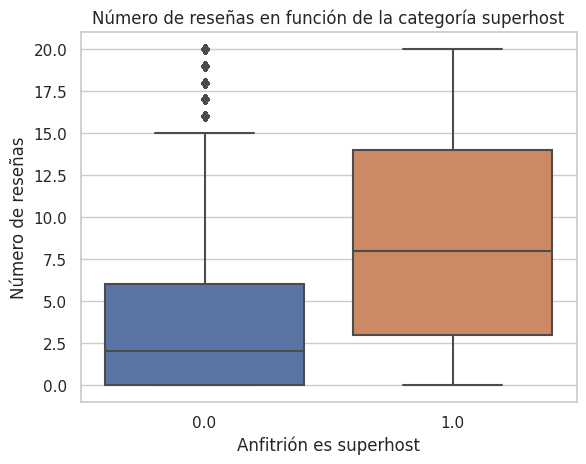

In [ ]:
ax=sns.boxplot(data=airbnb,
               x='host_is_superhost',
               y='number_of_reviews')

ax.set_xlabel('Anfitrión es superhost')
ax.set_ylabel('Número de reseñas')
ax.set_title('Número de reseñas en función de la categoría superhost')

Desde el boxplot podémos concluir que el hecho de que el anfitrión séa catalogado como superhost depende del número de reseñas que tenga el hospedaje. Ésto lo podémos determinar a partir de que los cuartíles Q1, Q2 y Q3 para la catagoría superhost, se encuentran notoriamente por encima que para la categoría de no superhost. Ésto nos puede decir que el número de reseñas aumenta la probabilidad de ser catalogado como superhost y en caso complementario, nos dice que el ser superhost aumenta la probabilidad de obtener más reseñas aumentando la popularidad del alojamiento.

### 4.9-Creación de un geoheatmap con Folium para el análisis de concentración de hospedajes

Vamos a trabajar con una herramientas de visualización de mapas interactivos. La librería se se llama folium. Instalamos la librería usando el gestor de paquetes pip. También importamos los módulos necesarios para crear nuestra visualización. Para más información de la librería folium consulte la [Documentación](https://python-visualization.github.io/folium/).

In [ ]:
!pip install -U folium

In [ ]:
import folium 
from folium.plugins import HeatMap

In [ ]:
map = folium.Map()
map

Podemos ubicar el mapa donde queramos, solo necesitamos las coordenadas del lugar. Por ejemplo, situemos nuestro mapa en la Plaza de Bolívar en Bogotá. Las coordenadas fueron obtenidas usando Google Maps. 
La estructura de las coordenadas es la siguiente:
```
[Latitud, Longitud]
```



In [ ]:
plaza_bolivar = [4.598464,-74.076184] # Coordenas de la plaza de Bolívar

map = folium.Map(location = plaza_bolivar,
                 zoom_start= 20, # Zoom inicial, valor más grande, mayo zoom
                 tiles="OpenStreetMap")
map

Luego de esa prueba interesante, ahora sí, construyamos el mapa de Nueva York con las coordenadas respectivas, vamos a centrar el mapa en Central Park.

In [ ]:
nueva_york = [40.781027,-73.965726]
map1 = folium.Map(location = nueva_york, zoom_start= 10,tiles="OpenStreetMap")
map1

Ahora necesitamos entregarle a Folium un contenedor de los datos de latitud y longitud. Para eso usamos la función zip que convierte dos objetos iterables y une los elementos en tuplas. Para más información consulte [aquí](https://ellibrodepython.com/zip-python).

In [ ]:
data = list(zip(airbnb['latitude'], 
                airbnb['longitude']))

data[0:10]

[(40.64749, -73.97237),
 (40.80902, -73.9419),
 (40.79685, -73.94872),
 (40.65599, -73.97519),
 (40.86754, -73.92639),
 (40.63702, -73.96327),
 (40.66278, -73.97966),
 (40.65944, -73.96238),
 (40.68554, -73.9409),
 (40.73961, -73.98074)]

Ahora vamos a crear la capa del mapa de calor usando un plugin de Folium llamada HeatMap. A este le pasamos los datos y algunos parámetros para ajustar el color. Es importante que la librería Folium esté actualizada para que el mapa sea reproducible. 

In [ ]:
hm_loc = HeatMap(data,
              min_opacity = 0.2,
              radius = 8,
              blur = 6)

In [ ]:
# Ahora añadimos la capa al mapa que ya habíamos creado

map1.add_child(hm_loc)
map1

El mapa de calor anterior nos está mostrando en que zonas de la ciudad hay una mayor densidad de hospedajes.

In [ ]:
# Podemos guardar el mapa como un archivo html interactivo

map1.save("heat_map_density.html")

El anterior heatmap confirma nuéstra hipótesis realizadas en el scatter plot de la latitud contra la longitud y en cuanto a la distribución de frecuencias de las longitudes y latitudes: Observando el mapa de calor en escencia vémos que exíste una alta concentración de hospedajes entorno a un puñado de zonas, más específicamente, son las zonas de Manhattan y la zona de Brooklyn. Más aún, cuando vímos los histogramas de la longitud y latitud vímos como éstas distribuciónes multimodales presentaban múltiples máximos insinuando una alta concentración de hospedajes. Vímos cómo en términos de la latitud existían cuátro máximos y en el caso de la longitud dos de ellos, trayendo éstras observaciónes al análisis del mapa de calor, podemos ver cómo éstas descripciones son acertadas al detectar en el mapa cinco clusters o regiones densas las cuales vistas verticalmente (latitudinalmente) puéden entenderse como cuatro máximos de concentración de hospedajes y que vístos horizontalmente (longitudinalmente) puéden ser entendidos como dos máximos  de concentración.

Ésto se debe a que los grupos vistos verticalmente generan una proyeccion en términos de la vertical  la cual puede observarse como cuatro únics grupos mientras que en términos de la proyección horizontal como dos. Por otra parte el mapa de calor valida el hecho de que son los barrios de Brooklyn, Manhattan y Queens aquellos que más hospedajes albergan siendo la zona de intersección entre los tres aquella donde la mayor cantidad exíste.

Éstos resultados son esperados, pues el número mayor de alojamientos reside en zonas de la ciudad privilegiadas e importantes como las zonas aledañas a Central Park y el distríto económico de WallStreet.

### 4.10-Creación de un geoheatmap con Folium para el análisis de precios

Ahora vamos a crear un mapa de calor que nos muestre en que zonas de la ciudad están los hospedajes más costosos.

In [ ]:
nueva_york = [40.781027,-73.965726]
map2 = folium.Map(location = nueva_york, zoom_start= 10,tiles="OpenStreetMap")
data2 = list(zip(airbnb['latitude'], 
                airbnb['longitude'],
                airbnb['price'])) # Note que pasamos una tercera columna que es el precio

data2[0:10]

[(40.64749, -73.97237, 149),
 (40.80902, -73.9419, 150),
 (40.79685, -73.94872, 190),
 (40.65599, -73.97519, 60),
 (40.86754, -73.92639, 80),
 (40.63702, -73.96327, 150),
 (40.66278, -73.97966, 120),
 (40.65944, -73.96238, 150),
 (40.68554, -73.9409, 115),
 (40.73961, -73.98074, 200)]

In [ ]:
hm_price = HeatMap(data2,
              min_opacity = 0.2,
              radius = 8,
              blur = 6)

map2.add_child(hm_price)
map2

In [ ]:
map2.save("heat_map_density.html")

Del anterior mapa de calor podémos concluir que los précios más altos coinciden con el análisis de precios en función del barrio realizado anteriormente donde barrios como Midtown, Upper East Side, Manhattan, Upper West Side, Williamsbur, Harlem y Brooklyn, son aquellos que describen un precio mayor en sus hospedajes. Más aún, el resultado del mapa de calor confirma que éstos barrios séan los más costosos para hospedarse ya que todos ellos se encuéntran al rededor de las zonas más importantes de la ciudad: Central Park y WallStreet.

## 5)-Conclusiones generales de la primera fase

Para concluir ésta primera fase del proyecto inestigativo, podémos resaltar las siguientes conclusiones:

1.   Explorando y analizando la base de datos de Airbnb nos permitió observar que no exíste una necesidad de limpieza de datos exautiva ya que en general los datos están bien estruturados, sin valores repetidos o ausentes. No obstante exíste una discrepancia en cuanto a los datos relacionados con el número de baños de los hospedajes pués éstos están dados como una colección de números enteros y no enteros.
2.   Se determinó que sin importar el análisis, cada distribución deducida presentaba una grán cantidad de valores atípicos y en general una alta varianza, acompañada con una tendencia a la asimetria con sesgo hacia la izquierda. Ésto ocurrió en cada caso reportado anteriormente.
3.   Se analizó el comportamiento del precio en función de variables como el número de baños, habitaciones, barrio, tipo de alojamiento, disponibilidad de parqueadero, número de reseñas y clasificacion del anfitrión como superhost. No obstante la mayoría de éstas variables no repercute sustancialmente en el precio, se detectó entonces que en orden descendiente de influencia las variables que si afectan el precio son: Barrio del alojamiento, tipo de alojamiento, número de habitaciónes y número de baños. No obstante es necesario un análisis cualitativo más profundo en éste respecto para dar mayor seguridad a cerca de si es o no ésta la jerarquia de influencia.
4.   Se concluye que más del 80% de los alojamientos se encuentran albergados por los barrios Brooklyn, Manhattan, Queens, Williamsbur y Bedford-Stuyvesant, siendo Brooklyn aquel que más alojamientos posee.
5.   Se observó que los alojamientos más ofrecidos en NewYork son apartamentos, casas y condominios, donde la categoría apartamentos cubre más del 80% de los hospedajes.
6.   Se determinó que la categoría de superhost es bastante importante para los anfitriones, pues determina una insignia de alta calidad de servicio. Se evidencia cómo exíste una alta necesidad por parte de los anfitriones de adquirir éste galardón pues el 91% de los hospedajes de NewYork poseen ésta clasificación. No obstante la categoría no implica que el precio del hospedaje aumente, de hecho, exíste un valor levemente inferior para los superhosts que para los no superhosts.
7.   Se concluye que el número de reseñas está estrechamente vinculado a la categoría de superhosts, ya que aquellos que son superhosts son más propensos a tener un alto número de reseñas. Por otra parte, el número de reseñas no es diréctamente proporcional al precio del alojamiento.
8.   Se evidencia que en la ciudad de NewYork, los alojamientos de Airbnb están practicamente homogéneamente distribuidos al rededor de las zonas de Cetral Park y WallStreet. A demás, se determinó que en éstas zonas, más especificamente en los barrios más cercanos a ellas como Midtown, Upper East Side, Manhatta, Upper West Side, Williamsburg , Harlem y Brooklyn, son aquellos que presentan el precio más elevado para los hospedajes.



Respuesta

**Aquí termina esta primera fase de exploración, en la siguiente trabajaremos en algo de limpieza, creación de nuevas variables y complementar nuestro análisis exploratorio preliminar. Siéntase libre de añadir abajo de esta celda cualquier otra pregunta de negocio, código relacionado u observaciones relevantes.**

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*